### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [98]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [99]:
import warnings
warnings.filterwarnings('ignore')

# Load the data.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


- No missing values


In [100]:
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [101]:
# create text only file for later use: remove all columns except review and summary
reviews_text = reviews[['review', 'summary']]
reviews_text

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [102]:
# viw basic stats
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [103]:
# how many products are there?
reviews['product'].value_counts()

1012    13
1031    13
979     12
977     11
3498    10
        ..
1459     9
263      9
466      8
254      8
453      8
Name: product, Length: 200, dtype: int64

## 2. Drop columns

In [104]:
# Drop unnecessary columns.
reviews2 = reviews.drop(columns  = ['product', 'language'])

# View column names.
reviews2.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'platform', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [105]:
# Rename the column headers.
reviews2.rename(columns={'remuneration (k£)': 'income'}, inplace=True)
reviews2.rename(columns={'spending_score (1-100)':'spend_score'}, inplace=True)

# View column names.
reviews2.columns

Index(['gender', 'age', 'income', 'spend_score', 'loyalty_points', 'education',
       'platform', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [106]:
# Create a CSV file as output.
reviews2.to_csv('turtle_reviews2.csv') 

In [107]:
# Import new CSV file with Pandas.
# Load the data.
reviews_master = pd.read_csv('turtle_reviews2.csv')

# View the DataFrame.
reviews_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   income          2000 non-null   float64
 4   spend_score     2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   platform        2000 non-null   object 
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


In [108]:
reviews_master.columns

Index(['Unnamed: 0', 'gender', 'age', 'income', 'spend_score',
       'loyalty_points', 'education', 'platform', 'review', 'summary'],
      dtype='object')

## 5. Linear regression

### 5a) spending vs loyalty

In [109]:
# Define the dependent variable.
y = reviews_master['loyalty_points'] 

# Define the independent variable.
x = reviews_master['spend_score'] 
 

In [110]:
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_master).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        09:55:23   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared measures the percentage of variation of a dependent variable that is explained by an independent variable.Therefore, the closer the value is to 1 the better the model. Value of 0.452 suggests 45% of model variation can be explained bu the inputs

In [111]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [112]:
# Set the the x coefficient to 33.06... and the constant to -75.05... to generate the regression table.
y_pred = 33.061693 * reviews_master['spend_score'] -75.052663

y_pred



0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spend_score, Length: 2000, dtype: float64

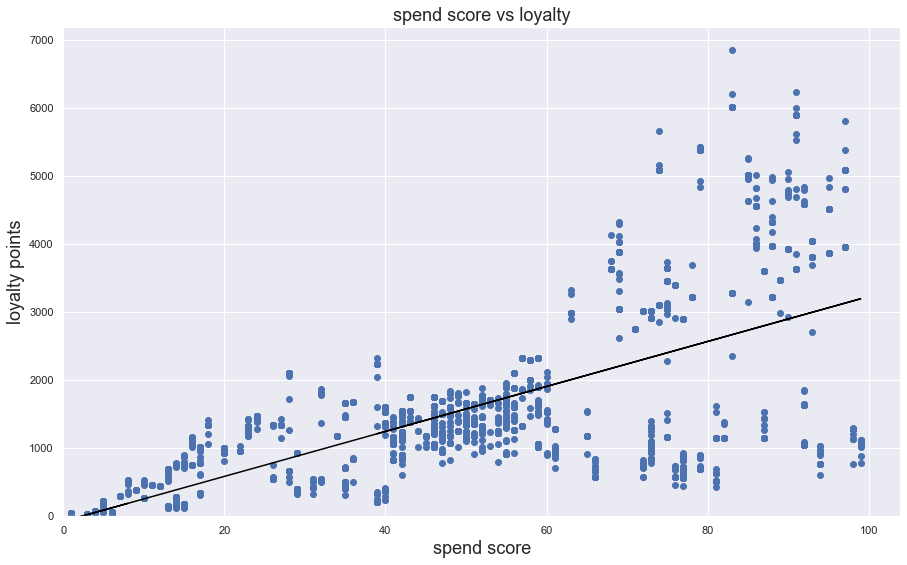

In [115]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.title('spend score vs loyalty', fontsize=18)
plt.xlabel('spend score', fontsize=18)
plt.ylabel('loyalty points', fontsize=18)
plt.xlim(0)
plt.ylim(0)
plt.show()

### Observations
- Loyalty increases with spend although relationship is weaker at high spend_score
- This data suggests two clusters of high spend_score customers; low point accumulators i.e. low value purchases, and high loyalty point accumulators e.g. high value purchases. 
- inputs into spend_score not clear (based on "spending nature and behaviour") a high spend score customer can have low loyalty points which is linked to the monetary value purchases. 
- no data on % of customers not in loyalty programme (if opt in). Note min value of loyalty points is 25 not zero
- area of business focus: targeting high spend_score customer with low points to drive higher value purchases
- recommended additional analysis - run k-means clustering model look for ~ 4 clusters

### 5b) income vs loyalty

In [116]:
# Define the dependent variable.
y = reviews_master['loyalty_points'] 

# Define the independent variable.
x = reviews_master['income'] 

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_master).fit()

In [117]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [118]:
# Set the the x coefficient to 34.18... and the constant to -65.686513 to generate the regression table.
y_pred = 34.187825 * reviews_master['income'] -65.686513

y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: income, Length: 2000, dtype: float64

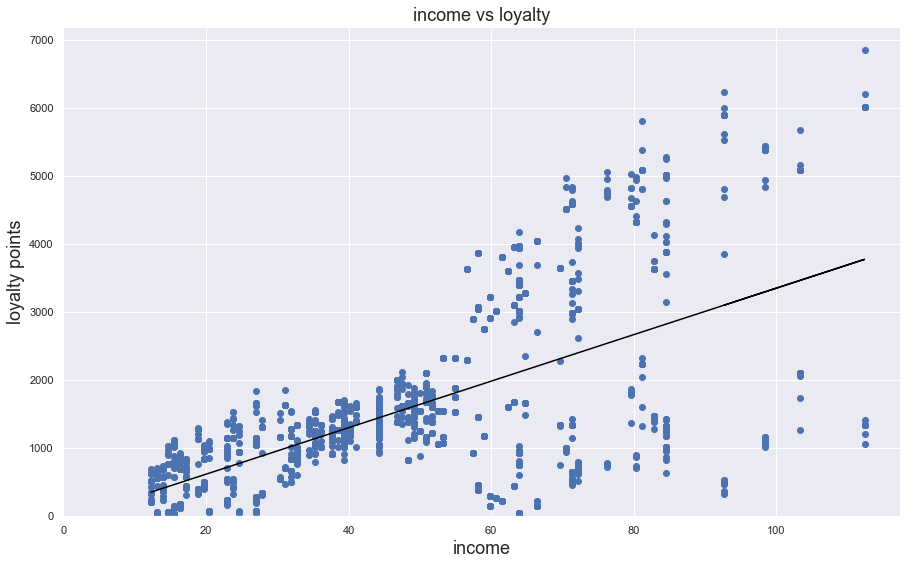

In [121]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.title('income vs loyalty', fontsize=18)
plt.xlabel('income', fontsize=18)
plt.ylabel('loyalty points', fontsize=18)
plt.xlim(0)
plt.ylim(0)
plt.show()


### Observations
- loyalty points increase with income but again two clusters 1) high income high loyality point 2) high income low loyality

### 5c) age vs loyalty

In [132]:

# Define the dependent variable.
y = reviews_master['loyalty_points'] 

# Define the independent variable.
x = reviews_master['age'] 

# Check for linearity.
#plt.scatter(x, y)  

# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = reviews_master).fit()


In [133]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  


Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [134]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * reviews_master['age'] + 1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

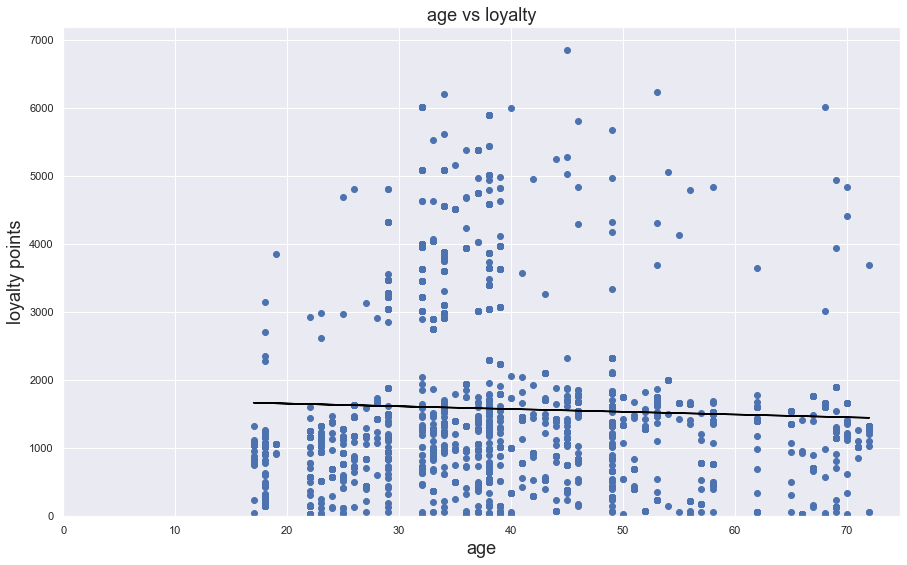

In [135]:
# Plot the graph with a regression line.
# Plot the data points.
plt.scatter(x,y)  

# Plot the regression line (in black).
plt.plot(x,y_pred, color='black') 

# Set the x and y limits on the axes:
plt.title('age vs loyalty', fontsize=18)
plt.xlabel('age', fontsize=18)
plt.ylabel('loyalty points', fontsize=18)
plt.xlim(0)
plt.ylim(0)
plt.show()


<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

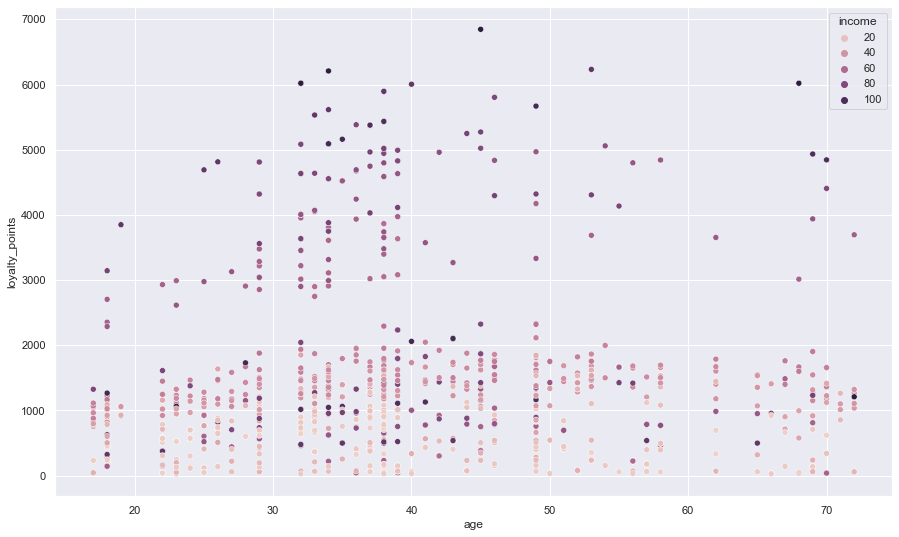

In [142]:
# Create a scatterplot with hue=income to understand 2 stark clusters
sns.color_palette("flare", as_cmap=True)
sns.scatterplot(x='age', y='loyalty_points',
                data=reviews_master, hue='income')

### Observations:
- 30-40 seems to be a sweet spot for loyalty points (more likely to have children?). 20-30s and 40-50s significant, low loyalty points populations
- limited realtionship but two distinct clusters of low loyalty point and a smaller group of high loyalty points. Income is a driver but something else is happening to make such a distinct break.

Text(0, 0.5, 'income')

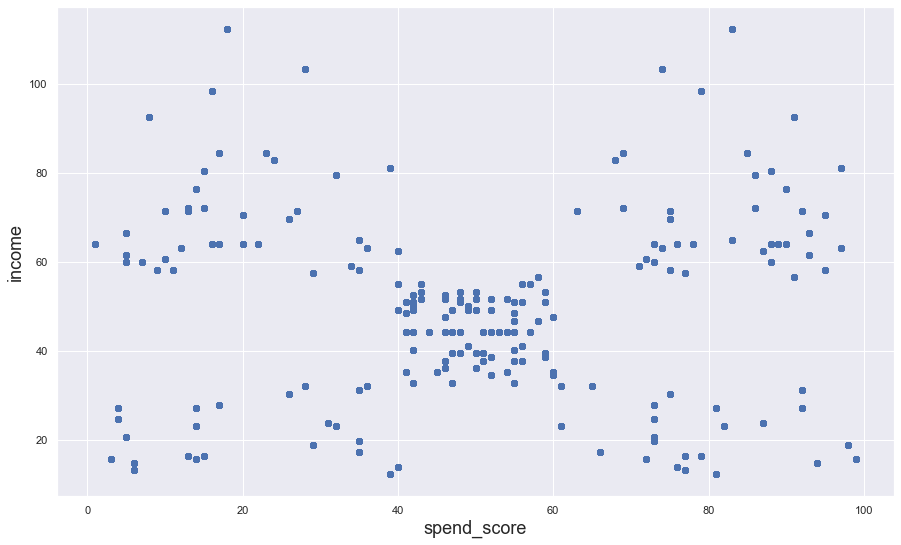

In [129]:
# check link between spend_score and income
# Define the dependent variable.
y = reviews_master['income'] 

# Define the independent variable.
x = reviews_master['spend_score'] 

# Check for linearity.
plt.scatter(x, y)
plt.xlabel('spend_score', fontsize=18)
plt.ylabel('income', fontsize=18)

### Observations
- 5 distinct clusters. Business relevance TBC

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [143]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [144]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews2.csv')

# View DataFrame.
df2.head()

,Unnamed: 0,gender,age,income,spend_score,loyalty_points,education,platform,review,summary
0,0,Male,18,12.30,39,210,graduate,Web,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,Web,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,Web,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,Web,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,Web,As my review of GF9's previous screens these w...,Money trap


In [145]:
# Drop unnecessary columns.
df3 = df2.drop(columns = ['Unnamed: 0','gender','age','loyalty_points','education','platform','review','summary'])

# View DataFrame.
df3.head()

,income,spend_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [146]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   income       2000 non-null   float64
 1   spend_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [147]:
df3.describe()

,income,spend_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

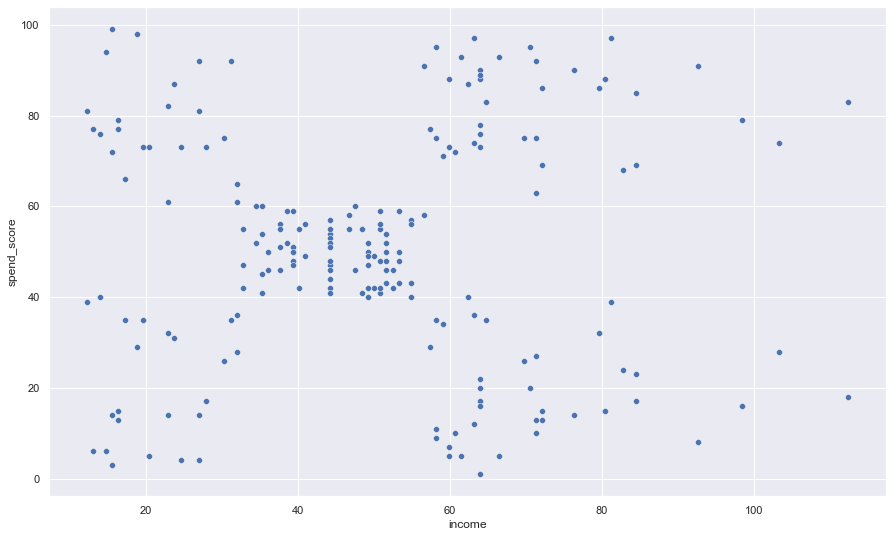

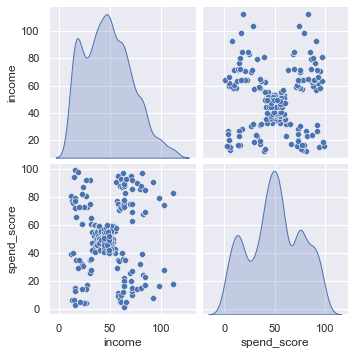

In [148]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='income', y='spend_score',
                data=df3)


# Create a pairplot with Seaborn.
# also this is defining the x as the data set for clusting 
x = df3[['income', 'spend_score']]

sns.pairplot(df3, vars=x, diag_kind= 'kde')


## 3. Elbow and silhoutte methods

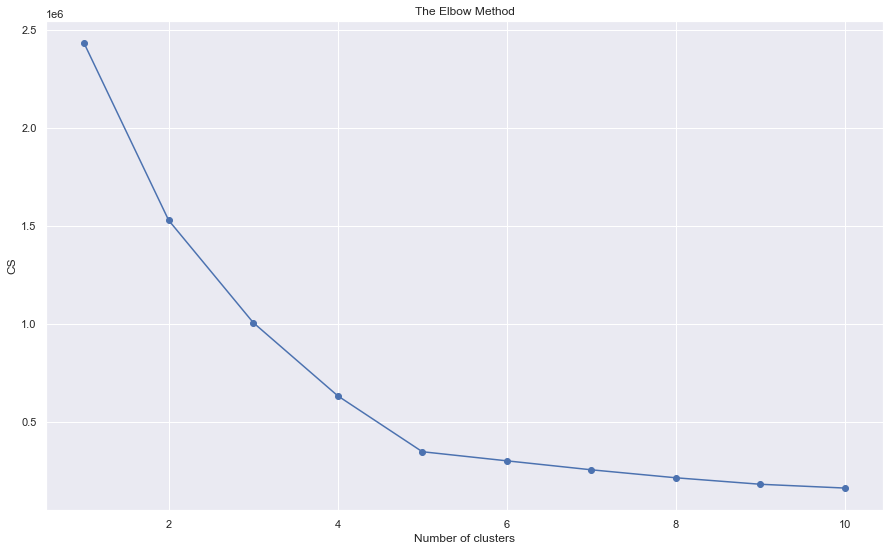

In [149]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")

plt.show()

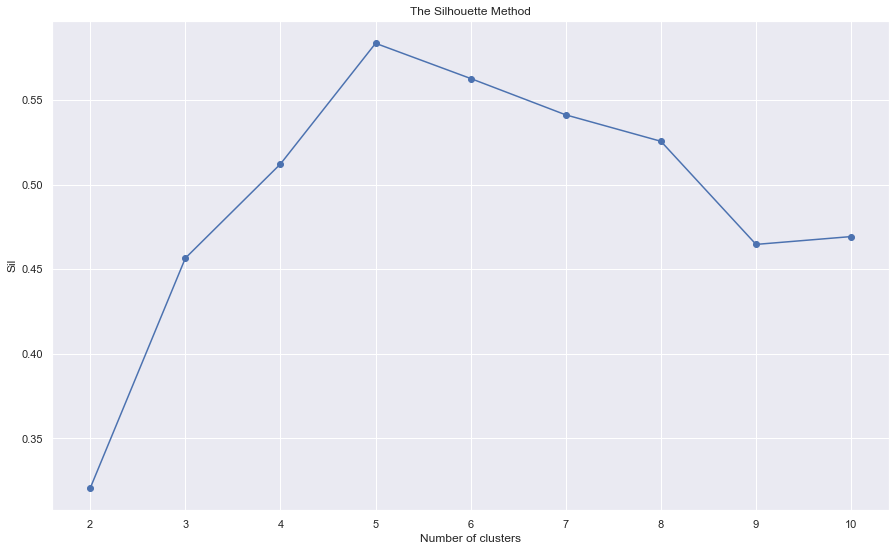

In [150]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

### Observations 
-5 clusters seems to be a good place to start and supported by scatter chart

## 4. Evaluate k-means model at different values of *k*

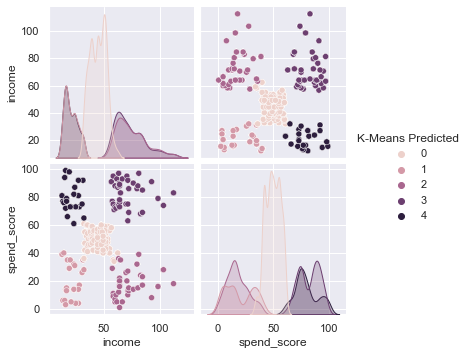

In [151]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
#new column added to x to contain cluster label
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [152]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

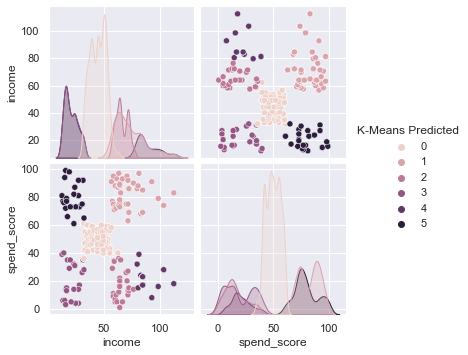

In [156]:
# any impovement from 6 clusters?
# Use 6 clusters:
kmeans = KMeans(n_clusters =6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
#new column added to x to contain cluster label
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [157]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

 ### Observation
- potential value in 6 clusters as indicating a high income/ low spend_score which would be a more attractive, focused target and a useful distinction for marketeers vs the middle earners. 
- I checked 4 clusters but deleted code as cleary not an option. 

## 5. Fit final model and justify your choice

In [38]:
# Apply the final model.
#see above - going with 6 clusters 

In [39]:
# Check the number of observations per predicted class.
# see above = large mid-income, mid-score group which is will be worth looking at futher to disaggregate with other variables.

## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='income', ylabel='spend_score'>

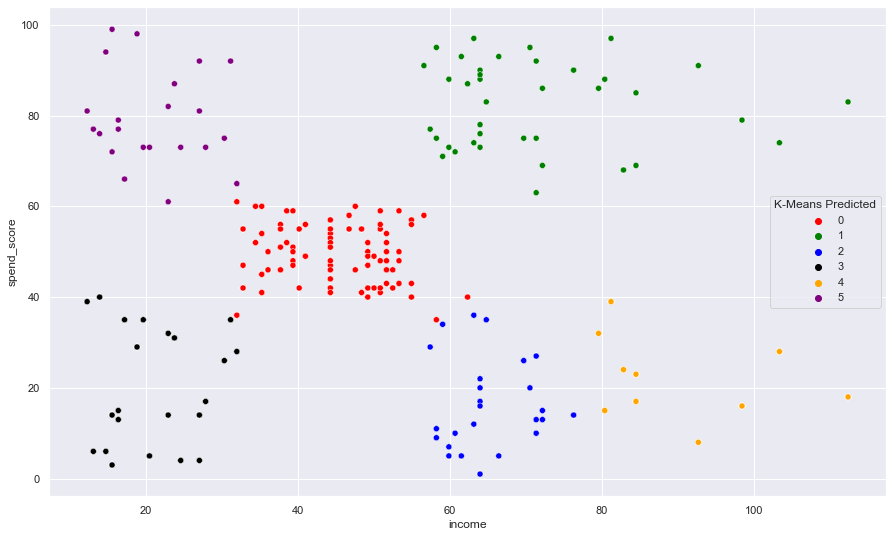

In [158]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(15, 9)})

sns.scatterplot(x='income' , 
                y ='spend_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'purple'])
# selected colours that contrast to grey backgroun for visibility



## 7. Discuss: Insights and observations

***Your observations here...***

- Cluster 0 with 767 customer warrants further analysis. Why are there no middle-income high spend-score customer. Id initially look at product mix vs other clusters to see what they are buying. 
- The high income/ low points clusters(2 and 4) are prime targets for further analysis and targeted campaigns


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [159]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [160]:
# Data with reviews aleady loaded as df2

# View DataFrame.
df2.head()

,Unnamed: 0,gender,age,income,spend_score,loyalty_points,education,platform,review,summary
0,0,Male,18,12.30,39,210,graduate,Web,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,1,Male,23,12.30,81,524,graduate,Web,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,2,Female,22,13.12,6,40,graduate,Web,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,3,Female,25,13.12,77,562,graduate,Web,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,4,Female,33,13.94,40,366,graduate,Web,As my review of GF9's previous screens these w...,Money trap


In [162]:
# Explore data set already done in week 1

In [164]:
# K Drop unnecessary columns.
# already done line 28
# View DataFrame.
reviews_text.to_csv('reviews_text.csv', index=False)
reviews_text.head()


,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [47]:
# Determine if there are any missing values.
# see above no nulls

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [165]:
# convert columns to lower case
for columns in reviews_text.columns:
    reviews_text[columns] = reviews_text[columns].str.lower() 
reviews_text.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


In [167]:
#join columns to one columns
rt_join = reviews_text[['review', 'summary']].apply(' '.join , axis=1)
rt_join.head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*:\n\nyour unpaint...
2    nice art, nice printing.  why two panels are f...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
dtype: object

In [168]:
#check length still the same
len(rt_join)

2000

In [169]:
#print one line to check join
print(rt_join.iloc[0])

when it comes to a dm's screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely. the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [170]:
# Replace all the punctuations in review column.
import re
# Filter out the specified punctuation.
#no_punct = re.sub(r"[\.\?\!\,\:\;\"]", '', review_text)
# cant remove from data frame 

#second attempt
#review_text.apply(lambda x: re.sub(r'[^\w\s]', '',x))
# stoll reqires string

#third attempt - fastest according to google using translate function
import string

punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))

reviews_text['review'] = '|'.join(reviews_text['review'].tolist()).translate(transtab).split('|')
reviews_text['summary'] = '|'.join(reviews_text['summary'].tolist()).translate(transtab).split('|')

# View output.
reviews_text

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when...,super fun
1997,great game for all\nkeeps the mind nimble,great game
1998,fun game,four stars


### 2c) Drop duplicates in both columns

In [171]:
# Drop duplicates in both columns.
rt_clean = reviews_text.drop_duplicates()

# view length of DataFrame.
len(rt_clean) 

1961

- 39 duplicated rows removed

In [172]:
# Check the number of duplicate values in the review column.
rt_clean.review.duplicated().sum()

11

In [173]:
# Check the number of duplicate values in the summary column.
rt_clean.summary.duplicated().sum()

610

- 11 duplicates in review column could be genuine duplicates or same review e.g. "good product". Given low volume we will drop
- 610 duplicates in summary is not likely genuine duplicates as review has been summarised in simple text e.g. "5 stars"; dont drop 

In [174]:
# Drop 11 duplicates in review
rt_clean = rt_clean.drop_duplicates(subset=['review'])

#reindex ESSENTIAL step
rt_clean.reset_index(inplace=True)

In [175]:
rt_clean.shape

(1950, 3)

In [176]:
rt_clean.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [177]:
# Create new DataFrame (copy DataFrame).
data = rt_clean.copy()

# View DataFrame.
data.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [178]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(data.shape[0]):
    # Add each comment.
    all_comments = all_comments + data['review'][i]

In [61]:
all_comments

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9\n\nyour unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which coul

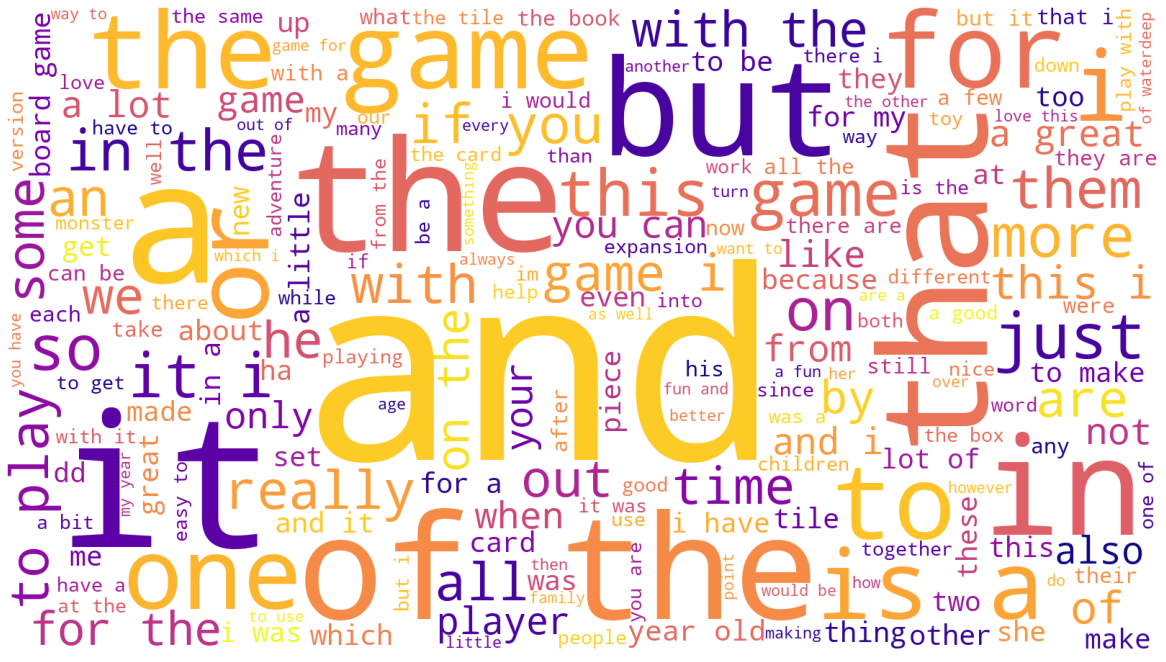

In [179]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [180]:
# Tokenise the words in new column
data['review_tokens'] = data['review'].apply(word_tokenize)
data['summary_tokens'] = data['summary'].apply(word_tokenize)

# Preview review token data.
data['review_tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: review_tokens, dtype: object

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1950 non-null   int64 
 1   review          1950 non-null   object
 2   summary         1950 non-null   object
 3   review_tokens   1950 non-null   object
 4   summary_tokens  1950 non-null   object
dtypes: int64(1), object(4)
memory usage: 76.3+ KB


In [182]:
# Review - Define an empty list of tokens
all_tokens_review = []

for i in range(data.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + data['review_tokens'][i]

In [183]:

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_review)

# Preview data.
fdist

FreqDist({'the': 5449, 'and': 3233, 'to': 3162, 'a': 3159, 'of': 2487, 'i': 2089, 'it': 2082, 'is': 1781, 'this': 1774, 'game': 1668, ...})

In [184]:
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens1_review = [word for word in all_tokens_review if word.isalnum()]

In [185]:
#remove stop words
# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
tokens2_review = [x for x in tokens1_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_review_string = ''

for value in tokens2_review:
    # Add each filtered token word to the string.
    tokens2_review_string = tokens2_review_string + value + ' '

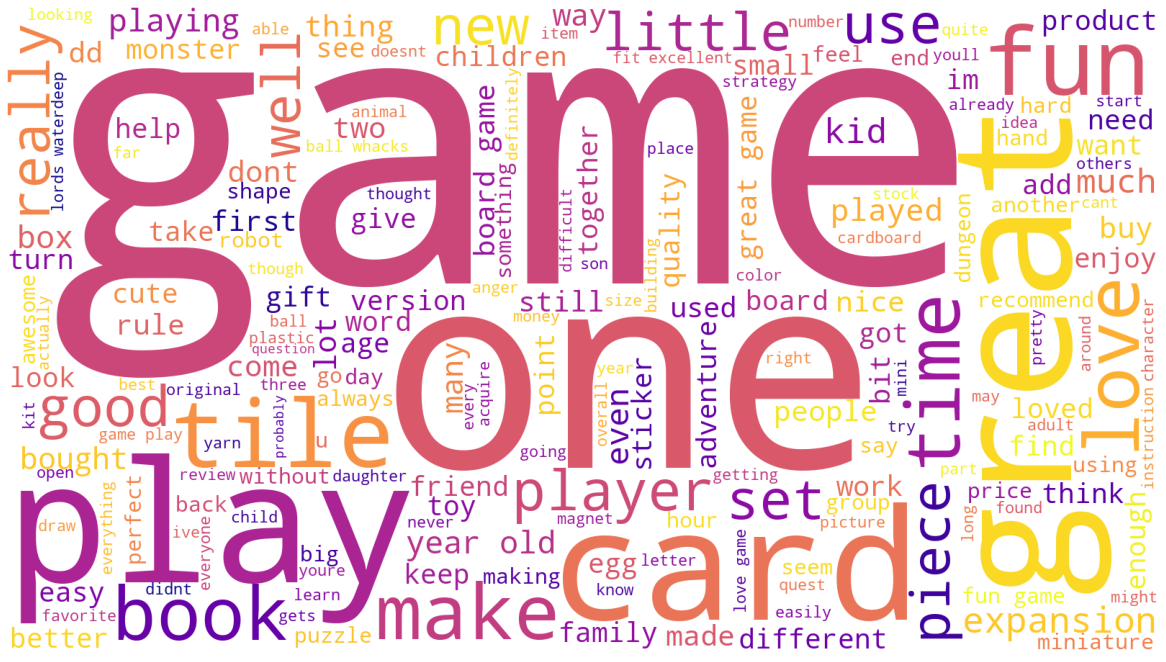

In [186]:
# Review: Plot the WordCloud image.
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_review_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()


### 4d) Identify 15 most common words and polarity

In [187]:
# Determine the 15 most common words.
# Re-calculate the frequency distribution.
fdist = FreqDist(tokens2_review)

# Show the five most common elements in the data set.
fdist.most_common(15)

[('game', 1668),
 ('great', 579),
 ('fun', 549),
 ('one', 530),
 ('play', 502),
 ('like', 414),
 ('love', 322),
 ('really', 319),
 ('get', 319),
 ('cards', 301),
 ('tiles', 297),
 ('time', 291),
 ('good', 287),
 ('would', 280),
 ('book', 273)]

In [188]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
game,1668
great,579
fun,549
one,530
play,502
like,414
love,322
really,319
get,319


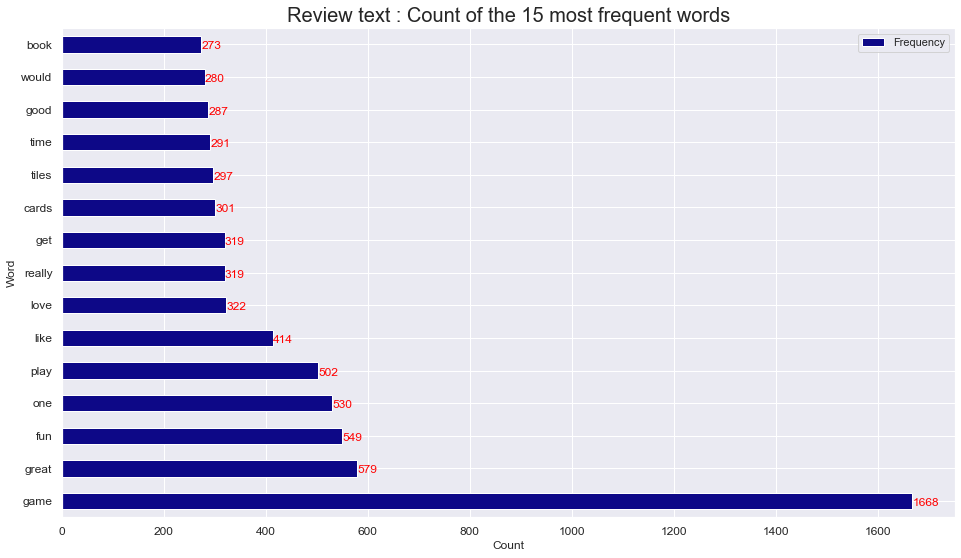

In [218]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review text : Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [73]:
#view cleaned data
rt_clean.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [190]:
# Determine polarity of reivews
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

# Populate a new column with polarity scores for each review.
rt_clean['polarity_review'] = rt_clean['review'].apply(generate_polarity)

# Preview the result.
rt_clean['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [191]:
# Determine subjectivity score of the review column
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each comment.
rt_clean['subjectivity_review'] = rt_clean['review'].apply(generate_subjectivity)

# Preview the result.
rt_clean['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

In [192]:
# view scores added to data frame
rt_clean.head()

,index,review,summary,polarity_review,subjectivity_review
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,-0.036111,0.486111
1,1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...,0.035952,0.442976
2,2,nice art nice printing why two panels are fil...,pretty but also pretty useless,0.116640,0.430435
3,3,amazing buy bought it as a gift for our new dm...,five stars,0.578788,0.784848
4,4,as my review of gf9s previous screens these we...,money trap,-0.316667,0.316667


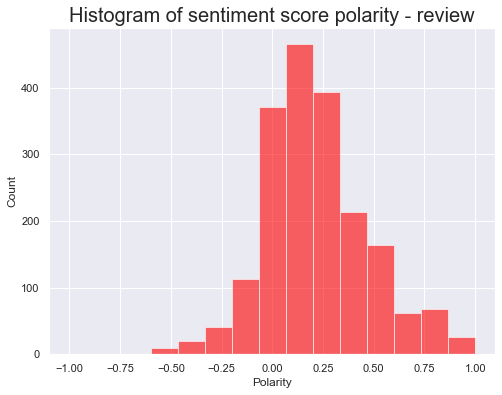

<Figure size 576x432 with 0 Axes>

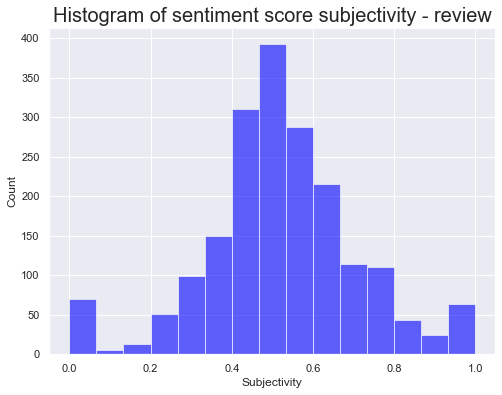

In [193]:
# Histogram of review sentiment

# attempt to plot side by side 
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(8,6))

# Define the bars.
ax1 = plt.hist(rt_clean['polarity_review'], num_bins, facecolor='red', alpha=0.6) 
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - review', fontsize=20)

#plot
plt.show()

# subjectivity plot
# Set the plot area.
plt.figure(figsize=(8,6))

# Set the plot area.
plt.figure(figsize=(8,6))

# Define the bars.
ax2 = plt.hist(rt_clean['subjectivity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity - review', fontsize=20)

#plot
plt.show()



In [221]:
# Get the top 20 most positive reviews based on polarity score i.e. near 1.0
rt_clean.sort_values('polarity_review', ascending=0).head(20)

,index,review,summary,polarity_review,subjectivity_review,polarity_summary,subjectivity_summary
517,524,perfect just what i ordered,five stars,1.0,1.0,0.0,0.0
489,496,excellent activity for teaching selfmanagement...,five stars,1.0,1.0,0.0,0.0
922,933,awesome,five stars,1.0,1.0,0.0,0.0
1279,1301,its awesome,five stars,1.0,1.0,0.0,0.0
193,194,awesome gift,five stars,1.0,1.0,0.0,0.0
601,609,delightful product,five stars,1.0,1.0,0.0,0.0
164,165,awesome book,five stars,1.0,1.0,0.0,0.0
1376,1401,one of the best board games i played in along ...,five stars,1.0,0.3,0.0,0.0
583,591,wonderful product,five stars,1.0,1.0,0.0,0.0
1920,1967,perfect for tutoring my grandson in spelling,tutoring,1.0,1.0,0.0,0.0


In [222]:
# Get the top 20 most positive reviews based on polarity score i.e. near 1.0
rt_clean.sort_values('polarity_review', ascending=1).head(20)

,index,review,summary,polarity_review,subjectivity_review,polarity_summary,subjectivity_summary
207,208,booo unles you are patient know how to measur...,boring unless you are a craft person which i am,-1.000000,1.000000,-1.00,1.0
181,182,incomplete kit very disappointing,incomplete kit,-0.780000,0.910000,0.00,0.0
1766,1804,im sorry i just find this product to be boring...,disappointing,-0.583333,0.750000,-0.60,0.7
362,364,one of my staff will be using this game soon s...,anger control game,-0.550000,0.300000,-0.55,0.3
229,230,i found the directions difficult,three stars,-0.500000,1.000000,0.00,0.0
300,301,difficult,three stars,-0.500000,1.000000,0.00,0.0
116,117,i bought this as a christmas gift for my grand...,stickers,-0.500000,0.900000,0.00,0.0
1496,1524,expensive for what you get,two stars,-0.500000,0.700000,0.00,0.0
289,290,instructions are complicated to follow,two stars,-0.500000,1.000000,0.00,0.0
226,227,this was a gift for my daughter i found it di...,two stars,-0.500000,1.000000,0.00,0.0


In [195]:
# Determine polarity of summary column. 
# Populate a new column with polarity scores for each comment.
rt_clean['polarity_summary'] = rt_clean['summary'].apply(generate_polarity)

# Preview the result.
rt_clean['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [196]:
# Populate a new column with subjectivity scores for each summary
rt_clean['subjectivity_summary'] = rt_clean['summary'].apply(generate_subjectivity)

# Preview the result.
rt_clean['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

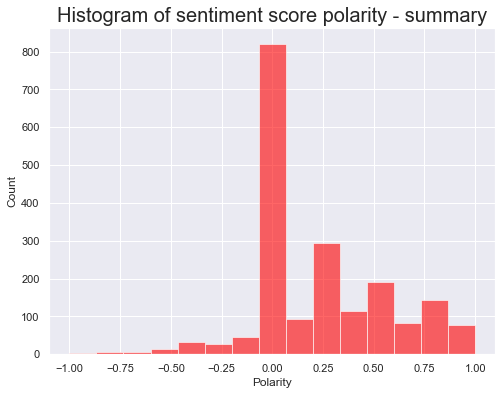

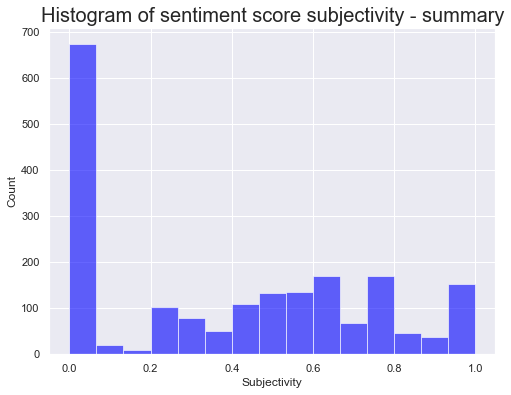

In [197]:
# Histogram of summary sentiment

# attemtp to show plots side-by-side
#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(8,6))

# Define the bars.
ax1 = plt.hist(rt_clean['polarity_summary'], num_bins, facecolor='red', alpha=0.6) 

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity - summary', fontsize=20)
plt.show()

# Set the plot area.
plt.figure(figsize=(8,6))

#plot
ax2 = plt.hist(rt_clean['subjectivity_summary'], num_bins, facecolor='blue', alpha=0.6)
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity - summary', fontsize=20)
plt.show()


### VADER sentiment analysis 

In [198]:
#sentiment analysis for review column
# generate list of values from the review colun of dataframe
# Determine values of output.
review_list_values = rt_clean['review'].values

# Split up each each review into individual words.
review_token = [word_tokenize(_) for _ in review_list_values]

#check toeknisation
#review_token[1]

# import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#create a variable to store output form Analyser
darth_vader = SentimentIntensityAnalyzer()

#run sentiment analyser
review_token_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in review_token}

print(review_token_polarity)


{'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely': {'neg': 0.108, 'neu': 0.833, 'pos': 0.059, 'compound': -0.6333}, 'an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inn

In [220]:
# add output to data frame and transpose columns to rows (.T)
sentiment_output = pd.DataFrame(review_token_polarity).T

# Get the top 10 most positive reviews
sentiment_output.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
entertaining,0.0,0.0,1.0,0.4404
fun gift,0.0,0.0,1.0,0.7351
ok,0.0,0.0,1.0,0.2960
cool,0.0,0.0,1.0,0.3182
great,0.0,0.0,1.0,0.6249
fantastic,0.0,0.0,1.0,0.5574
satisfied thanks,0.0,0.0,1.0,0.6908
awesome,0.0,0.0,1.0,0.6249
satisfied,0.0,0.0,1.0,0.4215
nice,0.0,0.0,1.0,0.4215


In [200]:
# Get the top 10 most negative reivews 
sentiment_output.sort_values('neg', ascending=0).head(10)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
no more comments,0.524,0.476,0.000,-0.2960
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
not a hard game to learn but not easy to win,0.470,0.456,0.075,-0.7946
i found the directions difficult,0.455,0.545,0.000,-0.3612
who doesnt love puppies great instructions pictures fun,0.445,0.334,0.221,-0.5207
different kids had red faces not sure they like,0.368,0.632,0.000,-0.4717
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520


In [201]:
# Get the top 10 review based on compound VADER score
sentiment_output.sort_values('compound', ascending=0).head(10)

neg    neu    pos  \
disclaimer bought this from a local store paid ...  0.035  0.758  0.207   
whenever i see this game on my shelf i get a di...  0.019  0.853  0.128   
if you only employ one creativityenhancing reso...  0.043  0.791  0.167   
as a dad of two boys im always on the lookout f...  0.032  0.787  0.181   
i grew up playing monopoly lots of people did i...  0.013  0.815  0.172   
lords of waterdeep was awesome and scoundrels o...  0.061  0.787  0.152   
this kit is awesome my 5year old daughter and i...  0.041  0.734  0.225   
lords of waterdeep scoundrels of skullport is a...  0.025  0.804  0.172   
we own this game as well as castle ravenloft on...  0.048  0.765  0.187   
wrath of ashardalon gets everything right for a...  0.054  0.774  0.171   

                                                    compound  
disclaimer bought this from a local store paid ...    0.9996  
whenever i see this game on my shelf i get a di...    0.9995  
if you only employ one creativityenhancing reso...    0.9992  
as a dad of two boys im always on the lookout f...    0.9991  
i grew up playing monopoly lots of people did i...    0.9989  
lords of waterdeep was awesome and scoundrels o...    0.9988  
this kit is awesome my 5year old daughter and i...    0.9988  
lords of waterdeep scoundrels of skullport is a...    0.9984  
we own this game as well as castle ravenloft on...    0.9976  
wrath of ashardalon gets everything right for a...    0.9976

In [202]:
# The describe function on the compound will show the distribution 
# The average is 0.637 so overall positive.
sentiment_output['compound'].describe()

count    1950.000000
mean        0.637391
std         0.401244
min        -0.991300
25%         0.527575
50%         0.790600
75%         0.908100
max         0.999600
Name: compound, dtype: float64

### Comment
- Mean of compund value is 0.63 of overall reviews are positive. 

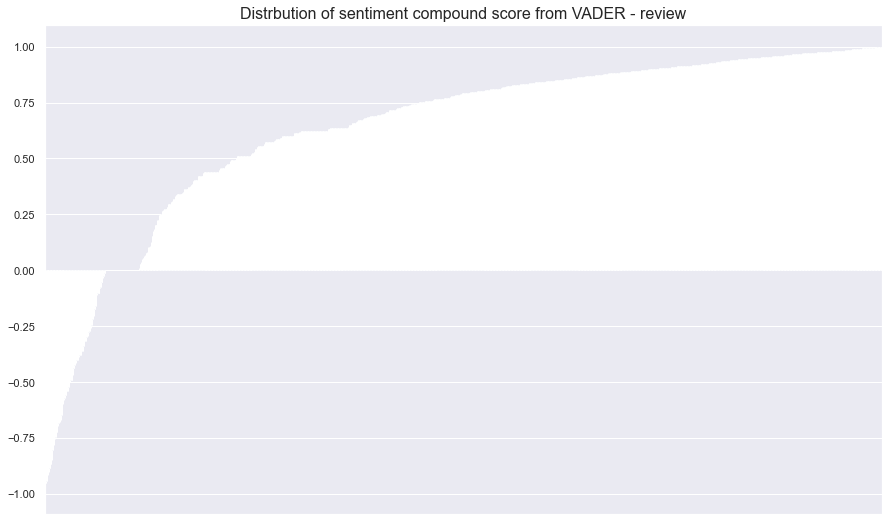

In [203]:
# plot distribution of compound scores for reviews to confirm overall positive sentiment 
sentiment_plot = sentiment_output.reset_index()['compound'].sort_values()
axl = plt.axes()
sentiment_plot.plot(kind='bar')

x_axis=axl.axes.get_xaxis()
x_axis.set_visible(False)
plt.title('Distrbution of sentiment compound score from VADER - review', fontsize=16)
plt.show()

### Comment:
- VADER sentiment analyser has a postive view of reviews like TextBlob. 
- Can we compare?

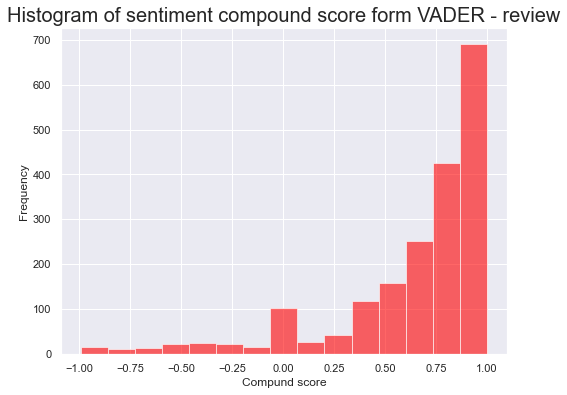

In [205]:
# histogram plot of VADER output for review column
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(8,6))

# Define the bars.
ax3 = plt.hist(sentiment_plot, num_bins, facecolor='red', alpha=0.6) 

# Set the labels.
plt.xlabel('Compund score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of sentiment compound score form VADER - review', fontsize=20)
plt.show()


In [206]:
#sentiment analysis for summary column
# generate list of values from the review colun of dataframe
# Determine values of output.
summary_list_values = rt_clean['summary'].values

# Split up each each review into individual words.
summary_token = [word_tokenize(_) for _ in summary_list_values]

#check toeknisation
#review_token[1]

# import necessary libraries
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#create a variable to store output form Analyser
darth_vader = SentimentIntensityAnalyzer()

#run sentiment analyser
summary_token_polarity =\
{" ".join(_) : darth_vader.polarity_scores(" ".join(_)) for _ in summary_token}

print(summary_token_polarity)

{'the fact that 50 of this space is wasted on art and not terribly informative or needed art': {'neg': 0.145, 'neu': 0.723, 'pos': 0.132, 'compound': -0.0711}, 'another worthless dungeon masters screen from galeforce9': {'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'compound': -0.4404}, 'pretty but also pretty useless': {'neg': 0.306, 'neu': 0.165, 'pos': 0.529, 'compound': 0.4019}, 'five stars': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'money trap': {'neg': 0.697, 'neu': 0.303, 'pos': 0.0, 'compound': -0.3182}, 'best gm screen ever': {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6369}, 'great but could be even better': {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.7506}, 'another missed opportunity not a value add to the product line': {'neg': 0.302, 'neu': 0.499, 'pos': 0.199, 'compound': -0.1119}, 'love the map': {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}, 'not a general dm screen': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, '

In [207]:
# add output to data frame and transpose columns to rows (.T)
sentiment_output_summary = pd.DataFrame(summary_token_polarity).T

# Get the top 10 positive summaries
sentiment_output_summary.sort_values('pos', ascending=0).head(10)

,neg,neu,pos,compound
awesome,0.0,0.0,1.0,0.6249
great gift,0.0,0.0,1.0,0.7906
precious,0.0,0.0,1.0,0.5719
pretty cool,0.0,0.0,1.0,0.6705
wow,0.0,0.0,1.0,0.5859
ok ok,0.0,0.0,1.0,0.5267
beautiful,0.0,0.0,1.0,0.5994
perfect,0.0,0.0,1.0,0.5719
great,0.0,0.0,1.0,0.6249
ok,0.0,0.0,1.0,0.2960


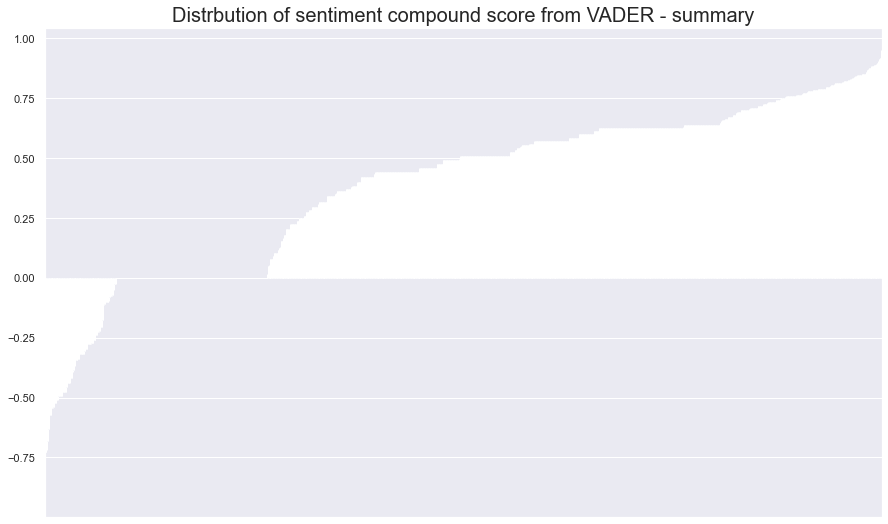

In [208]:
sentiment_plot_summary = sentiment_output_summary.reset_index()['compound'].sort_values()
axl = plt.axes()
sentiment_plot_summary.plot(kind='bar')

x_axis=axl.axes.get_xaxis()
x_axis.set_visible(False)

plt.title('Distrbution of sentiment compound score from VADER - summary', fontsize=20)

plt.show()

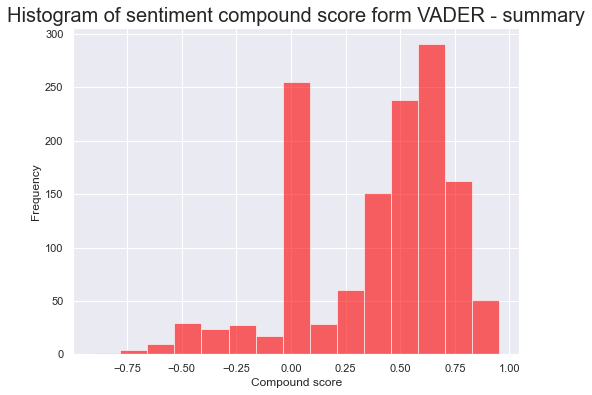

In [209]:
# histogram plot of VADER output for summary column 
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(8,6))

# Define the bars.
ax3 = plt.hist(sentiment_plot_summary, num_bins, facecolor='red', alpha=0.6) 

# Set the labels.
plt.xlabel('Compound score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of sentiment compound score form VADER - summary', fontsize=20)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [210]:
# Top 20 negative reviews.
sentiment_output.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
difficult,1.000,0.000,0.000,-0.3612
incomplete kit very disappointing,0.538,0.462,0.000,-0.5413
no more comments,0.524,0.476,0.000,-0.2960
a crappy cardboard ghost of the original hard to believe they did this but they did shame on hasbro disgusting,0.487,0.455,0.058,-0.9052
not a hard game to learn but not easy to win,0.470,0.456,0.075,-0.7946
i found the directions difficult,0.455,0.545,0.000,-0.3612
who doesnt love puppies great instructions pictures fun,0.445,0.334,0.221,-0.5207
different kids had red faces not sure they like,0.368,0.632,0.000,-0.4717
got the product in damaged condition,0.367,0.633,0.000,-0.4404
i bought this thinking it would be really fun but i was disappointed its really messy and it isnt nearly as easy as it seems also the glue is useless for a 9 year old the instructions are very difficult,0.362,0.592,0.045,-0.9520


In [211]:
# Top 20 negative summaries.
sentiment_output_summary.sort_values('neg', ascending=0).head(20)

,neg,neu,pos,compound
disappointing,1.000,0.000,0.0,-0.4939
meh,1.000,0.000,0.0,-0.0772
boring,1.000,0.000,0.0,-0.3182
disappointed,1.000,0.000,0.0,-0.4767
frustrating,1.000,0.000,0.0,-0.4404
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


In [217]:
# save negative summaries as df for export
neg_sum_vader = sentiment_output_summary.sort_values('neg', ascending=0).head(20)
neg_sum_vader.head(20)

,neg,neu,pos,compound
disappointing,1.000,0.000,0.0,-0.4939
meh,1.000,0.000,0.0,-0.0772
boring,1.000,0.000,0.0,-0.3182
disappointed,1.000,0.000,0.0,-0.4767
frustrating,1.000,0.000,0.0,-0.4404
defective poor qc,0.857,0.143,0.0,-0.7184
not great,0.767,0.233,0.0,-0.5096
mad dragon,0.762,0.238,0.0,-0.4939
no 20 sided die,0.753,0.247,0.0,-0.7269
damaged product,0.744,0.256,0.0,-0.4404


In [213]:
# Top 20 positive reviews.
sentiment_output.sort_values('pos', ascending=0).head(20)

,neg,neu,pos,compound
entertaining,0.0,0.0,1.0,0.4404
fun gift,0.0,0.0,1.0,0.7351
ok,0.0,0.0,1.0,0.2960
cool,0.0,0.0,1.0,0.3182
great,0.0,0.0,1.0,0.6249
fantastic,0.0,0.0,1.0,0.5574
satisfied thanks,0.0,0.0,1.0,0.6908
awesome,0.0,0.0,1.0,0.6249
satisfied,0.0,0.0,1.0,0.4215
nice,0.0,0.0,1.0,0.4215


In [214]:
# Top 20 positive summaries.
sentiment_output_summary.sort_values('pos', ascending=0).head(20)


,neg,neu,pos,compound
awesome,0.0,0.0,1.0,0.6249
great gift,0.0,0.0,1.0,0.7906
precious,0.0,0.0,1.0,0.5719
pretty cool,0.0,0.0,1.0,0.6705
wow,0.0,0.0,1.0,0.5859
ok ok,0.0,0.0,1.0,0.5267
beautiful,0.0,0.0,1.0,0.5994
perfect,0.0,0.0,1.0,0.5719
great,0.0,0.0,1.0,0.6249
ok,0.0,0.0,1.0,0.2960


## 7. Discuss: Insights and observations

***Your observations here...***

- Overall positive sentiment from both VADER and TextBlob
- Vader analysis seemed more positive but VADER is optimised for social media data so potentially less suited to the large review volumes text. Also is a comparison even valid?
- Negative reviews provide hits at potential product as service issues around quality of construction, quality of the actual game and age suitability
- further analysis would be to look ag negative reviews in more detail to categorise type of review so identify recuring issues by product e.g. quality, service issues, marketing material


# 